# Importing Libraries

In [6]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [7]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [10]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [11]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [13]:
start_date=datetime.datetime(2023,12,1)
enddate=start_date+datetime.timedelta(500)

In [14]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [15]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [16]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [17]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [18]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [19]:
dic={}
for key in profit_and_loss:
    dic[key]=profit_and_loss[key].to_dict()

In [20]:
realized_pnl_time=pd.DataFrame(dic).sort_index().ffill().fillna(0)
realized_pnl_time.index=pd.to_datetime(realized_pnl_time.index).round(freq='d')
realized_pnl_time=realized_pnl_time.groupby(realized_pnl_time.index).sum()

In [21]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [22]:
holding=Binance.get_inventory()

In [23]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,3730.076530,1.0001,-131.886217,1545.15,1413.263783
OMUSDT,526.319895,1674.476938,0.4489,0.000000,1148.16,1148.160000
BTCUSDT,601.021649,895.437926,0.2401,3.537078,294.42,297.957078
SOLUSDT,281.200518,443.152572,0.1188,0.000000,161.95,161.950000
JASMYUSDT,387.458505,347.199355,0.0931,0.000000,-40.26,-40.260000
ETHUSDT,250.747339,222.937860,0.0598,0.000000,-27.81,-27.810000
TRXUSDT,76.868953,111.008315,0.0298,-10.723889,34.14,23.416111
BBUSDT,60.176053,34.702475,0.0093,-39.733101,-25.47,-65.203101
BNBUSDT,1.142121,1.161085,0.0003,-10.606040,0.02,-10.586040
PEPEUSDT,0.000004,0.000004,0.0000,-38.521986,0.00,-38.521986


In [24]:
data1=Binance.get_price(tickers,start_date)
data2=Binance.get_price(tickers,enddate)
data=data1.combine_first(data2)
data.index=pd.to_datetime(data.index)
#data=data.dropna(axis=1)
n=len(data.columns)
data=data.sort_index()

In [25]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [26]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [27]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [29]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [30]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [31]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])

In [32]:
price_pnl.index=pd.to_datetime(price_pnl.index)
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()
for col in quantities:
    
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]

C:\Users\niroo\AppData\Local\Temp\ipykernel_7400\1175112299.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum()[0]


In [33]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25     -7.470131
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-14    -25.751420
2025-01-15    217.398651
2025-01-16    -59.599538
2025-01-17    124.747094
2025-01-18    -15.903539
Name: Total, Length: 118, dtype: float64

In [34]:
pnl_history['Total']

2024-09-23    -378.365173
2024-09-24    -354.861834
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-14    1357.431054
2025-01-15    1574.829706
2025-01-16    1515.230168
2025-01-17    1639.977262
2025-01-18    1624.073723
Name: Total, Length: 118, dtype: float64

In [35]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [36]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [37]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [38]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_7400\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [39]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [40]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [41]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

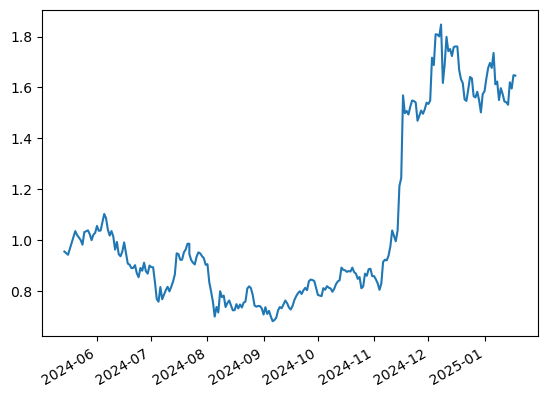

In [42]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [44]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [47]:
historical_risk=RiskAnalysis(returns_to_use)
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [48]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [51]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4029
BNBUSDT,0.1958
XRPUSDT,0.1811
SUIUSDT,0.0999
PEPEUSDT,0.0725
RAYUSDT,0.0312
AAVEUSDT,0.0168
XLMUSDT,0.0000
TRXUSDT,0.0000
WBTCUSDT,0.0000


In [52]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.376302
BTCUSDT,0.300000
XRPUSDT,0.127305
SUIUSDT,0.081056
BNBUSDT,0.058528
PEPEUSDT,0.037612
RAYUSDT,0.019197


### Current results

In [54]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [55]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
BTCUSDT,0.495361
OMUSDT,0.388513
TRXUSDT,0.116126


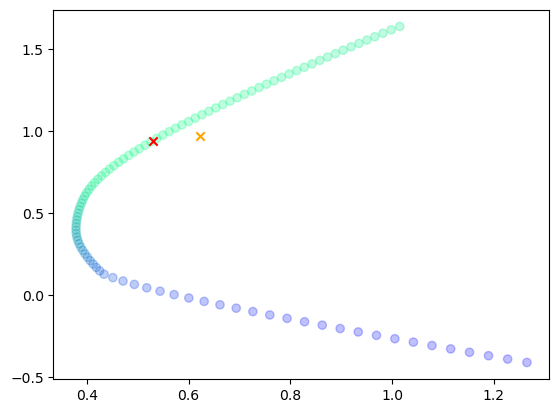

In [56]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [58]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison['Weights']=current_holding_comparison['Weights'].round(7)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1674.476938,0.448912,0.388513,0.060399
BTCUSDT,895.437926,0.240059,0.495361,-0.255302
SOLUSDT,443.152572,0.118805,0.000000,0.000000
JASMYUSDT,347.199355,0.093081,0.000000,0.000000
ETHUSDT,222.937860,0.059768,0.000000,0.000000
TRXUSDT,111.008315,0.029760,0.116126,-0.086366
BBUSDT,34.702475,0.009303,0.000000,0.000000
BNBUSDT,1.161085,0.000311,0.000000,0.000000
PEPEUSDT,0.000004,0.000000,0.000000,0.000000


In [59]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison['Weights']=historical_comparison['Weights'].round(7)
historical_comparison=historical_comparison.fillna(0)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,1674.476938,0.448912,0.376302,0.072610
BTCUSDT,895.437926,0.240059,0.300000,-0.059941
SOLUSDT,443.152572,0.118805,0.000000,0.000000
JASMYUSDT,347.199355,0.093081,0.000000,0.000000
ETHUSDT,222.937860,0.059768,0.000000,0.000000
TRXUSDT,111.008315,0.029760,0.000000,0.000000
BBUSDT,34.702475,0.009303,0.000000,0.000000
BNBUSDT,1.161085,0.000311,0.058528,-0.058217
PEPEUSDT,0.000004,0.000000,0.037612,-0.037612
XRPUSDT,0.000000,0.000000,0.127305,0.000000


# Risk Reward Analysis

In [61]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [62]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

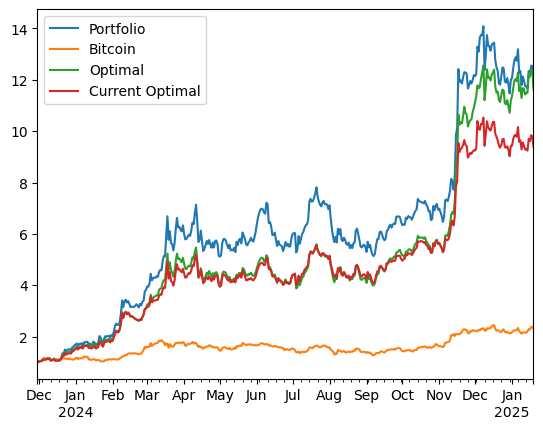

In [63]:
(1+portfolio_perf.loc[:]).cumprod().plot()

In [64]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

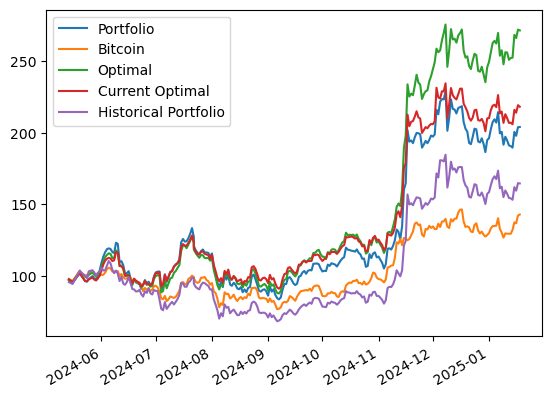

In [65]:
((1+current_perf).cumprod()*100).plot()

In [66]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-09,191.711578,126.750994,247.966550,206.978994,155.071619
2025-01-10,197.302260,129.693358,256.371108,213.067547,159.729385
2025-01-11,194.704963,129.520567,256.263860,210.360860,157.464627
2025-01-12,191.269960,129.445338,251.118469,206.951460,154.493622
2025-01-13,190.697434,129.433070,252.362099,207.133965,154.218040
2025-01-14,189.678849,132.175978,252.591456,206.015579,153.215122
2025-01-15,200.688035,137.457449,268.550829,216.121847,162.042883
2025-01-16,197.953781,136.758041,266.346195,214.118322,159.577157
2025-01-17,203.974093,142.241005,272.184062,219.364830,164.832054
2025-01-18,204.069367,142.893805,271.655595,218.284174,164.645552


## Volatilities

In [68]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.623717
 dtype: float64,
 0.6244466590199024)

In [69]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.622107
 dtype: float64,
 0.622106736873486)

In [70]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.700395
Bitcoin            0.430523
Optimal            0.624447
Current Optimal    0.603796
dtype: float64

In [71]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4414579588612561

## Risk Contribution

In [73]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.087770,0.058528,0.007472,0.020812,0.001952,0.018860
BTCUSDT,0.390738,0.300000,0.035278,0.134276,0.042780,0.091496
OMUSDT,17.373327,0.376302,0.906523,0.668231,0.555412,0.112818
PEPEUSDT,0.125200,0.037612,0.008315,0.034959,0.005673,0.029285
RAYUSDT,0.085736,0.019197,0.005359,0.018385,0.001285,0.017100
SUIUSDT,0.215703,0.081056,0.015156,0.055747,0.015249,0.040497
XRPUSDT,0.301427,0.127305,0.021897,0.067591,0.019112,0.048479


In [74]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,0.854480,0.388513,0.582455,0.675763,0.552534,0.123229
BTCUSDT,0.238211,0.495361,0.343745,0.250237,0.145152,0.105085
TRXUSDT,0.041366,0.116126,0.073799,0.074000,0.033985,0.040014


In [75]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,0.989712,0.45,0.675159,0.666636,0.539089,0.127547
BTCUSDT,0.115412,0.24,0.166672,0.101705,0.024779,0.076925
SOLUSDT,0.042216,0.12,0.076072,0.087822,0.016686,0.071135
JASMYUSDT,-0.015174,0.09,0.035090,0.090860,0.025312,0.065547
ETHUSDT,-0.003477,0.06,0.026507,0.029813,0.002787,0.027026
TRXUSDT,0.010687,0.03,0.019080,0.012614,0.001650,0.010965
BBUSDT,-0.006972,0.01,0.001420,0.010551,0.000413,0.010138


# Value At Risk

## Historical

### Optimal Weights

In [79]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.0512534535623411, -0.07477420663809095)

### Current Weights

In [81]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.04933105180027059, -0.07180718909327988)

In [82]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [83]:
var=historical_var.iloc[row]
var

OMUSDT      -0.033381
BTCUSDT     -0.002240
SOLUSDT     -0.003692
JASMYUSDT   -0.004998
ETHUSDT     -0.001657
TRXUSDT     -0.000430
BBUSDT      -0.001246
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.047644
Name: 2024-07-22 00:00:00, dtype: float64

In [84]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.039432
BTCUSDT     -0.008677
SOLUSDT     -0.008107
JASMYUSDT   -0.008856
ETHUSDT     -0.002940
TRXUSDT     -0.001088
BBUSDT      -0.000980
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.070081
dtype: float64

## Parametric

### Optimal Weights

In [87]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.06470268940440238, -0.08293095851359153)

### Current Weights

In [89]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.06446023593991002, -0.08262020020678265)

## Multivariate

### Optimal Weights

In [92]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.05717636013961229, -0.07375312596387087)

### Current Weights

In [94]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06073661617478915, -0.07713375461939195)

In [95]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.040475
BTCUSDT     -0.005986
SOLUSDT     -0.005241
JASMYUSDT   -0.005421
ETHUSDT     -0.002026
TRXUSDT     -0.000795
BBUSDT      -0.000693
Portfolio   -0.060636
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [99]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.058011965760394066, -0.07240048742808898)

### Current Weights

In [101]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05931538194523155, -0.07707538851471017)

In [102]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.040140
BTCUSDT     -0.006316
SOLUSDT     -0.005483
JASMYUSDT   -0.005466
ETHUSDT     -0.001821
TRXUSDT     -0.000751
BBUSDT      -0.000589
Portfolio   -0.060566
dtype: float64

## Student Copula

### Optimal Weights

In [105]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.05844195441040943, -0.07448252320009628)

### Current Weights

In [107]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.061323148913764274, -0.078240914410964)

In [108]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.040870
BTCUSDT     -0.006364
SOLUSDT     -0.005221
JASMYUSDT   -0.006088
ETHUSDT     -0.002014
TRXUSDT     -0.000394
BBUSDT      -0.000820
Portfolio   -0.061771
dtype: float64

## Gumbel Copula

### Optimal Weights

In [111]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.10651732210980212, -0.15361230198483675)

### Current Weights

In [113]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.10707657641860241, -0.151809058055602)

In [114]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.093371
BTCUSDT     -0.003504
SOLUSDT     -0.002189
JASMYUSDT   -0.006147
ETHUSDT     -0.000649
TRXUSDT     -0.000086
BBUSDT      -0.000041
Portfolio   -0.105987
dtype: float64

## Monte Carlo

### Optimal

In [117]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [118]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0667182281249056, -0.08296584101357175)

### Current Weights

In [120]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06485730846983268, -0.08048698146897248)

In [121]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.040361
BTCUSDT     -0.007280
SOLUSDT     -0.006186
JASMYUSDT   -0.007868
ETHUSDT     -0.002429
TRXUSDT     -0.000856
BBUSDT      -0.000856
Portfolio   -0.065836
dtype: float64

## VaR Violation

In [123]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.055154,-0.095229,-0.079727,-0.020069
2024-01-15,-0.055154,-0.095263,-0.081205,0.020687
2024-01-16,-0.055154,-0.094746,-0.078461,0.040923
2024-01-17,-0.055154,-0.096415,-0.080132,-0.025648
2024-01-18,-0.055154,-0.099192,-0.085630,-0.039191
...,...,...,...,...
2025-01-15,-0.057670,-0.066063,-0.066573,0.063183
2025-01-16,-0.057670,-0.066033,-0.065366,-0.008209
2025-01-17,-0.054325,-0.062194,-0.059205,0.021918
2025-01-18,-0.054325,-0.061554,-0.059479,-0.001942


In [124]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.034310,-0.083953,-0.082420,-0.016135
2024-05-29,-0.034295,-0.081383,-0.073857,-0.008603
2024-05-30,-0.034295,-0.070310,-0.066516,0.030165
2024-05-31,-0.034295,-0.071094,-0.065404,0.035238
2024-06-01,-0.034295,-0.074062,-0.067147,0.050722
...,...,...,...,...
2025-01-15,-0.065854,-0.075151,-0.071625,0.058041
2025-01-16,-0.065854,-0.075700,-0.076407,-0.013624
2025-01-17,-0.065854,-0.075459,-0.073949,0.030413
2025-01-18,-0.065854,-0.073903,-0.074450,0.000467


<Axes: >

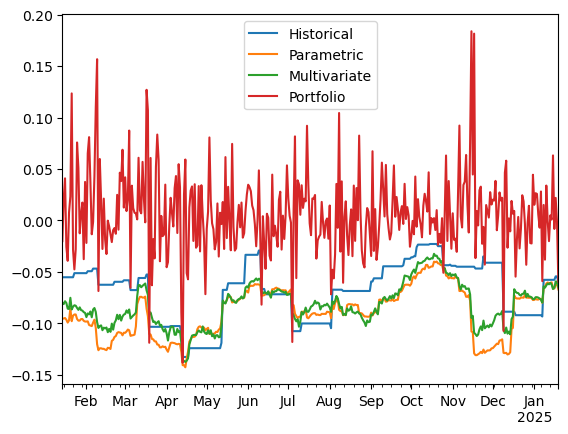

In [125]:
var_data.plot()

<Axes: >

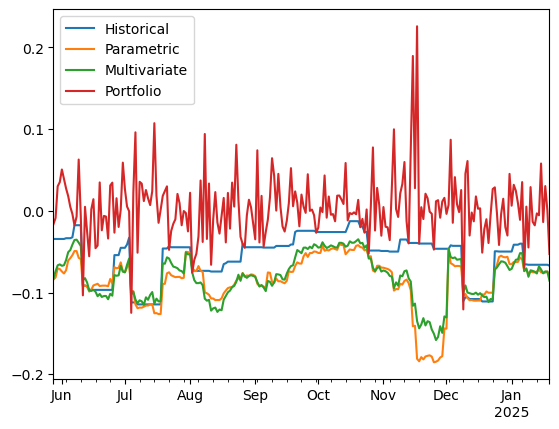

In [126]:
current_var_data.plot()

In [127]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.024194,0.010753,0.016129
Kupiec Stat,6.391585,17.500093,12.067165
P-value,0.011466,0.000029,0.000513


In [128]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.067511,0.016878,0.016878
Kupiec Stat,1.385315,7.282301,7.282301
P-value,0.239198,0.006964,0.006964


# Principal Component Analysis

## Historical PCA

In [131]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.77892535, 0.07090773, 0.05662822, 0.05151997, 0.04201873])

In [132]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT     0.015980
ADAUSDT      0.016452
ALGOUSDT     0.018638
APTUSDT      0.016728
ARBUSDT      0.017971
ATOMUSDT     0.016433
AVAXUSDT     0.018193
BCHUSDT      0.015266
BNBUSDT      0.008509
BONKUSDT     0.022937
BTCUSDT      0.009544
CRVUSDT      0.019243
DOGEUSDT     0.017576
DOTUSDT      0.017290
ENSUSDT      0.020285
EOSUSDT      0.017318
ETCUSDT      0.015825
ETHUSDT      0.012490
FDUSDUSDT    0.000040
FETUSDT      0.021709
FILUSDT      0.018884
FLOKIUSDT    0.023051
FLOWUSDT     0.018494
GALAUSDT     0.022320
GRTUSDT      0.020835
HBARUSDT     0.018182
ICPUSDT      0.016933
IMXUSDT      0.018954
INJUSDT      0.019278
IOTAUSDT     0.019539
JASMYUSDT    0.019363
LDOUSDT      0.019473
LINKUSDT     0.016241
LTCUSDT      0.012545
MKRUSDT      0.012997
NEARUSDT     0.020688
OMUSDT       0.010697
OPUSDT       0.018591
PEPEUSDT     0.023583
QNTUSDT      0.014335
RAYUSDT      0.018370
RUNEUSDT     0.020268
SANDUSDT     0.020307
SEIUSDT      0.020405
SHIBUSDT     0.017882
SOLUSDT   

<Axes: >

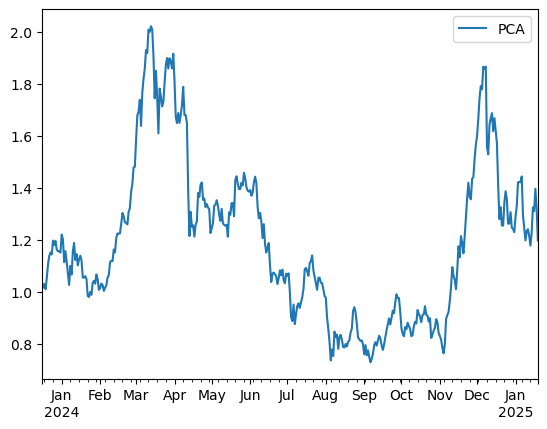

In [133]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

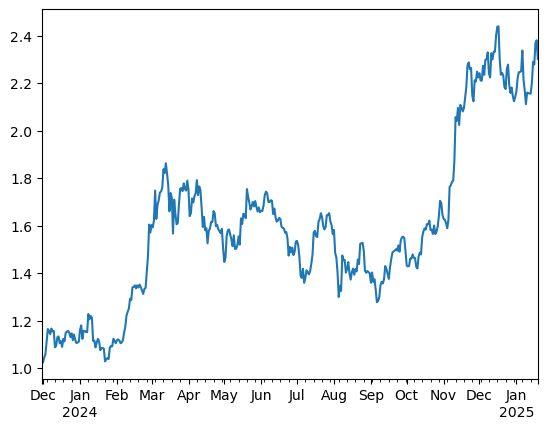

In [134]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [135]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.423207
WBETHUSDT    0.436130
ETHUSDT      0.436433
ETCUSDT      0.452309
               ...   
WLDUSDT      1.142822
BONKUSDT     1.151955
RAYUSDT      1.154682
PEPEUSDT     1.196912
OMUSDT       1.559582
Length: 61, dtype: float64

<Axes: >

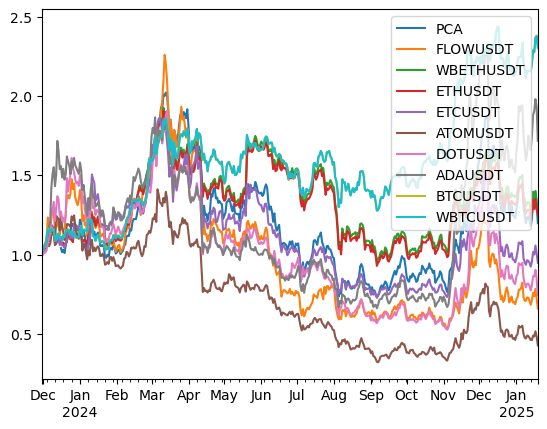

In [136]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

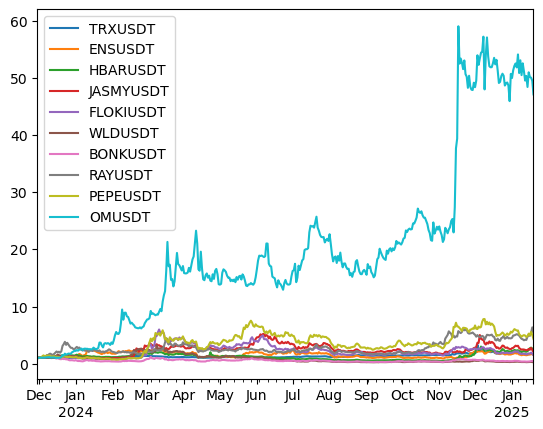

In [137]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [139]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.56030075, 0.14353644, 0.12489366, 0.09960036, 0.07166878])

In [140]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.091984
BTCUSDT      0.061097
SOLUSDT      0.099340
JASMYUSDT    0.173059
ETHUSDT      0.084744
TRXUSDT      0.054862
BBUSDT       0.209955
BNBUSDT      0.066182
PEPEUSDT     0.158776
Name: PC1, dtype: float64

<Axes: >

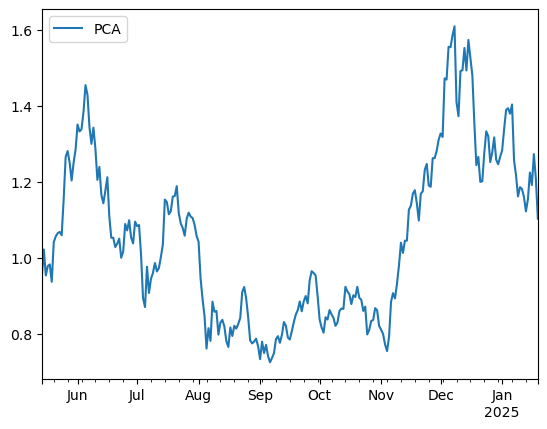

In [141]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

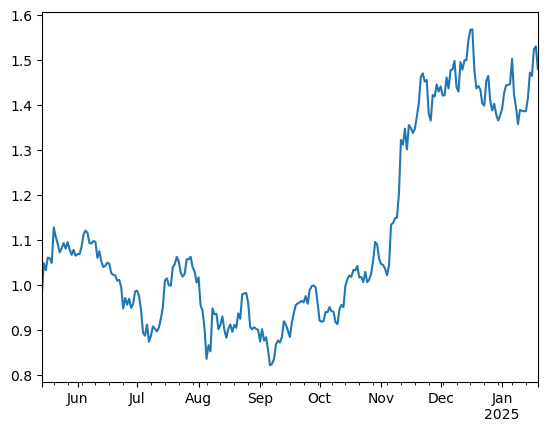

In [142]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [143]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.421663
BNBUSDT      0.446420
BTCUSDT      0.462536
SOLUSDT      0.470599
JASMYUSDT    0.671875
PEPEUSDT     0.729729
BBUSDT       0.760617
TRXUSDT      0.892780
OMUSDT       0.926061
dtype: float64

<Axes: >

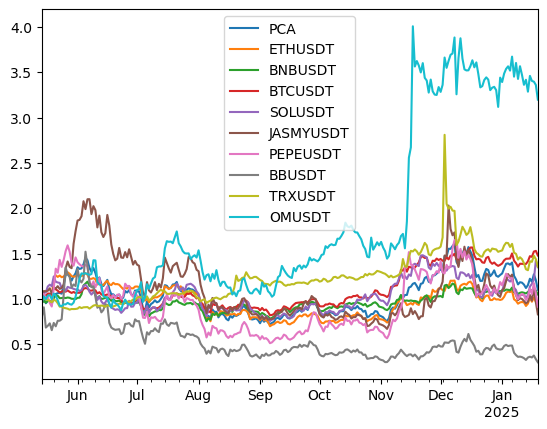

In [144]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [146]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.905487
BBUSDT       1.574243
JASMYUSDT    1.316038
SOLUSDT      1.161760
BTCUSDT      1.000000
ETHUSDT      0.970117
OMUSDT       0.878875
BNBUSDT      0.662483
TRXUSDT      0.316514
Name: BTCUSDT, dtype: float64

In [147]:
days=15
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.309152
PEPEUSDT     2.119382
BBUSDT       1.924944
SOLUSDT      1.442463
ETHUSDT      1.223623
TRXUSDT      1.181092
BTCUSDT      1.000000
OMUSDT       0.873200
BNBUSDT      0.697139
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [149]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [150]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
JASMYUSDT,0.284144
ETHUSDT,0.227364
BNBUSDT,0.189137
SOLUSDT,0.167517
PEPEUSDT,0.117582
BBUSDT,0.110202
TRXUSDT,0.017579
BTCUSDT,-0.019564
OMUSDT,-0.043525


### Regression to PCA

In [152]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-15:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

1.1770353028476903

In [153]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.297147
BNBUSDT      1.174786
ETHUSDT      1.020640
PCA          1.000000
SOLUSDT      0.749788
JASMYUSDT    0.437816
PEPEUSDT     0.407725
BBUSDT       0.374135
OMUSDT       0.244546
TRXUSDT      0.237322
dtype: float64

In [154]:
reg=ex_ante_perf.copy().dropna().iloc[-15:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      2.346756
BTCUSDT      1.730957
TRXUSDT      1.219369
ETHUSDT      1.198466
PCA          1.000000
OMUSDT       0.754171
BBUSDT       0.751971
PEPEUSDT     0.723352
JASMYUSDT    0.644952
SOLUSDT      0.362856
dtype: float64

### Correlation Matrix

<Axes: >

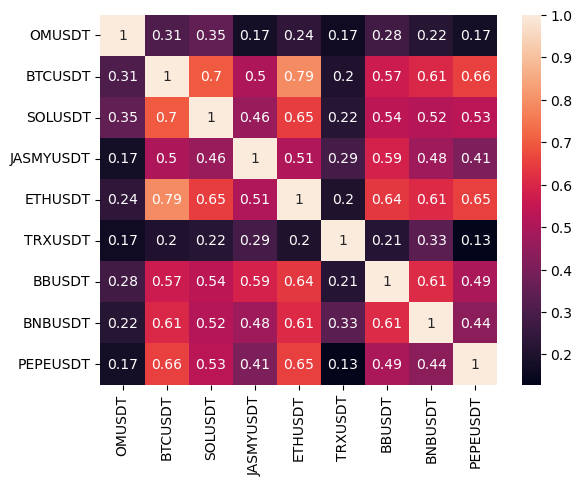

In [156]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

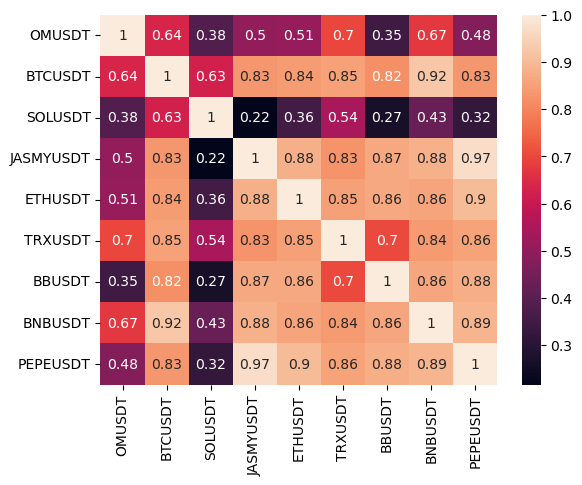

In [157]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [159]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [160]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-13,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.087370,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-13,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.979640,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-08-12,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.148254,0.0
2024-09-11,0.589621,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223379,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-11,0.003767,0.0,0.0,0.023158,0.0,0.0,0.0,0.0,0.0,0.0,...,0.439491,0.077526,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-10,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-12-10,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.033837,0.251208,0.0
2025-01-09,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-19,0.003767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
